In [ ]:
# ALY 6980 Capstone 
# Course Number (CRN): 20656
# Group 1
# Author : Avi Jani, Anmol Sachdev and Dhara Photowala
# Revision Date: March 26, 2024
# Purpose of the file: Final Deliverables of the Code to Arbit Company

In [61]:
import pandas as pd
# List of file paths
file_paths = [
    r"C:\Users\avija\OneDrive\Desktop\CAPSTONE\DATASET 2\2021.csv",
    r"C:\Users\avija\OneDrive\Desktop\CAPSTONE\DATASET 2\2022.csv",
    r"C:\Users\avija\OneDrive\Desktop\CAPSTONE\DATASET 2\2023-24.csv"
]
# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each file path and read the CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Remove all rows containing NaN values
combined_df = combined_df.dropna()

# Display the combined DataFrame
print(combined_df)

                   SKU  CONDITION  SIZE GENDER               SOLD_AT  \
0           304292-011     is_new   9.5    men  2021-11-25T02:12:54Z   
1        JBM231-M19-C1     is_new   9.5    men  2021-08-21T06:38:44Z   
2           304292-011     is_new     9    men  2021-12-07T13:38:03Z   
3           304292-011     is_new    10    men  2021-11-19T08:07:44Z   
4           304292-011     is_new   9.5    men  2021-01-27T21:50:25Z   
...                ...        ...   ...    ...                   ...   
2884666     DZ1382-001  Brand New   7.5    men  2023-03-30T00:00:00Z   
2884667     CQ4277-001  Brand New    14    men  2023-03-23T00:00:00Z   
2884668     DZ1382-001  Brand New   7.5    men  2023-05-03T00:00:00Z   
2884669     CZ2670-001  Brand New  10.5    men  2023-03-24T00:00:00Z   
2884670         HQ6316  Brand New  10.5    men  2023-03-20T00:00:00Z   

         SOLD_PRICE  SOURCE  SIZE_VALUE   BRAND  \
0           40000.0  stockx         9.5    Nike   
1           39114.0  stockx      

In [62]:
is_new_count = (combined_df['CONDITION'] == 'is_new').sum()

# Filter rows based on condition 'brand new'
brand_new_count = (combined_df['CONDITION'] == 'Brand New').sum()

# Display the counts separately
print("Count satisfying 'is new' condition separately:", is_new_count)
print("Count satisfying 'brand new' condition separately:", brand_new_count)

Count satisfying 'is new' condition separately: 2843496
Count satisfying 'brand new' condition separately: 40963


In [63]:
# Differentiate numerical and categorical features
numerical_features = combined_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = combined_df.select_dtypes(exclude=['number']).columns.tolist()

# Display the identified features
display("Numerical Features:", numerical_features)
display("\nCategorical Features:", categorical_features)


'Numerical Features:'

['SOLD_PRICE', 'SIZE_VALUE']

'\nCategorical Features:'

['SKU',
 'CONDITION',
 'SIZE',
 'GENDER',
 'SOLD_AT',
 'SOURCE',
 'BRAND',
 'NAME',
 'COLORWAY',
 'COLOR',
 'SILHOUETTE',
 'IS_COLLAB',
 'COLLABORATOR']

In [64]:
# Calculate descriptive statistics for numerical features
numerical_stats = combined_df.select_dtypes(include=['number']).describe()

# Calculate descriptive statistics for categorical features
categorical_stats = combined_df.select_dtypes(exclude=['number']).describe()

# Display descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
display(numerical_stats)

# Display descriptive statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
display(categorical_stats)


Descriptive Statistics for Numerical Features:


,SOLD_PRICE,SIZE_VALUE
count,2.884459e+06,2.884459e+06
mean,3.345932e+02,9.330874e+00
std,3.793705e+02,2.432138e+00
min,0.000000e+00,0.000000e+00
25%,1.770000e+02,8.000000e+00
50%,2.600000e+02,9.500000e+00
75%,3.540000e+02,1.100000e+01
max,5.000000e+04,2.150000e+01



Descriptive Statistics for Categorical Features:


,SKU,CONDITION,SIZE,GENDER,SOLD_AT,SOURCE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,IS_COLLAB,COLLABORATOR
count,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459,2884459
unique,2623,2,543,2,2753825,4,3,2613,1941,15,483,1,59
top,HQ6448,is_new,10,men,2023-06-01T00:00:00Z,stockx,adidas,adidas Yeezy Slide Onyx (2022/2023),Onyx/Onyx/Onyx,black,Yeezy Boost 350,True,kanye west
freq,57971,2843496,294548,2839815,326,2643331,1706965,57971,114142,617270,590655,2884459,1615850


In [65]:
# Get unique brands and their counts
unique_brands = combined_df['BRAND'].value_counts()

# Print unique brands and their counts
print("Unique brands and their counts:")
for brand, count in unique_brands.items():
    print(f"{brand}: {count}")

# Print total number of unique brands
total_brands = len(unique_brands)
print(f"Total number of unique brands: {total_brands}")



Unique brands and their counts:
adidas: 1706965
Nike: 938275
Jordan: 239219
Total number of unique brands: 3


In [66]:
# Are there any seasonal trends in the sold prices of sneakers, particularly across different quarters of the year?

c:\Users\avija\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


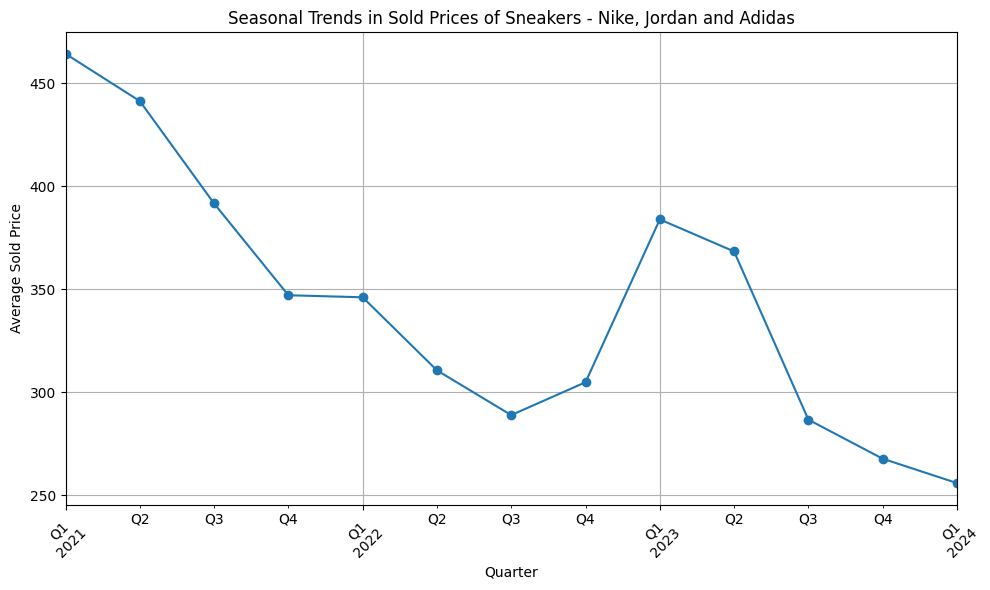

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE' and 'SOLD_AT'
# Adjust the column names and DataFrame structure as per your actual data

# Convert 'SOLD_AT' column to datetime format
combined_df['SOLD_AT'] = pd.to_datetime(combined_df['SOLD_AT'])

# Extract quarter from 'SOLD_AT' column
combined_df['Quarter'] = combined_df['SOLD_AT'].dt.to_period('Q')

# Group by 'Quarter' and calculate the mean sold price for each quarter
quarterly_prices = combined_df.groupby('Quarter')['SOLD_PRICE'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
quarterly_prices.plot(marker='o', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('Average Sold Price')
plt.title('Seasonal Trends in Sold Prices of Sneakers - Nike, Jordan and Adidas')
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [68]:
import numpy as np
# Filter data for only the 'Nike' brand
nike_sold_prices = combined_df[combined_df['BRAND'] == 'Nike']['SOLD_PRICE']

# Remove 0 values
nike_sold_prices = nike_sold_prices[nike_sold_prices != 0]



# Calculate quartiles
Q1 = nike_sold_prices.quantile(0.25)
Q3 = nike_sold_prices.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
nike_sold_prices = nike_sold_prices[(nike_sold_prices >= lower_bound) & (nike_sold_prices <= upper_bound)]

# Display the table
print(nike_sold_prices)




56417      792.0
56421      792.0
56422      792.0
56423      792.0
56424      792.0
           ...  
2884625     10.0
2884627     10.0
2884628     10.0
2884630     10.0
2884638      1.0
Name: SOLD_PRICE, Length: 872514, dtype: float64


In [69]:
import pandas as pd

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE', 'BRAND', 'GENDER', and 'SOLD_AT'
# Adjust the column names and DataFrame structure as per your actual data

# Filter data for only the 'Nike' brand
nike_df = combined_df[combined_df['BRAND'] == 'Nike']

# Filter data for gender 'Men' and 'Women', and remove null SOLD_AT values
nike_men_df = nike_df[(nike_df['GENDER'] == 'men') & (nike_df['SOLD_AT'].notna())]
nike_women_df = nike_df[(nike_df['GENDER'] == 'women') & (nike_df['SOLD_AT'].notna())]

# Function to remove outliers and zero values using Z-scores
def remove_outliers_and_zeros(data):
    # Remove zeros
    data_no_zeros = data[data != 0]
    # Calculate Z-scores
    z_scores = (data_no_zeros - data_no_zeros.mean()) / data_no_zeros.std()
    threshold = 3
    # Remove outliers
    return data_no_zeros[abs(z_scores) < threshold]

# Remove outliers and zeros for men's and women's sold prices
nike_men_prices_no_outliers = remove_outliers_and_zeros(nike_men_df['SOLD_PRICE'])
nike_women_prices_no_outliers = remove_outliers_and_zeros(nike_women_df['SOLD_PRICE'])

# Display the prices for men and women separately
print("Men's Nike Sold Prices without Outliers and Zeros:")
print(nike_men_prices_no_outliers)

print("\nWomen's Nike Sold Prices without Outliers and Zeros:")
print(nike_women_prices_no_outliers)


Men's Nike Sold Prices without Outliers and Zeros:
17295      1592.0
17298      1592.0
17303      1592.0
17308      1591.0
17313      1591.0
            ...  
2884625      10.0
2884627      10.0
2884628      10.0
2884630      10.0
2884638       1.0
Name: SOLD_PRICE, Length: 907345, dtype: float64

Women's Nike Sold Prices without Outliers and Zeros:
63887      730.0
63894      730.0
64027      729.0
64064      728.0
64314      725.0
           ...  
2883936     45.0
2884331     33.0
2884436     30.0
2884511     25.0
2884536     25.0
Name: SOLD_PRICE, Length: 19025, dtype: float64


c:\Users\avija\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\avija\AppData\Local\Temp\ipykernel_38884\2418290058.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_men_df['Quarter'] = nike_men_df['SOLD_AT'].dt.to_period('Q')
C:\Users\avija\AppData\Local\Temp\ipykernel_38884\2418290058.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_women_df['Quarter'] = 

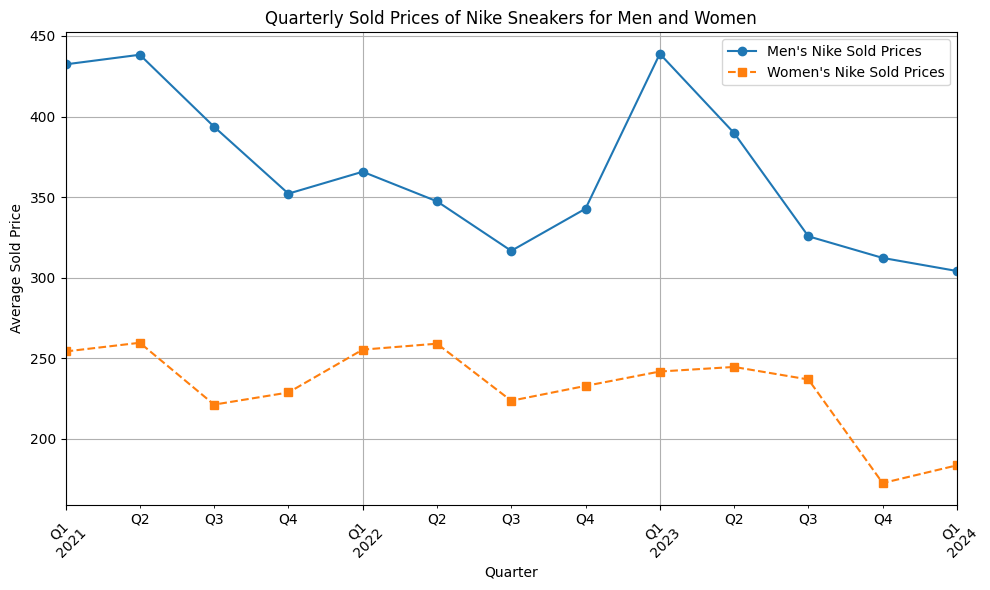

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE', 'SOLD_AT', 'BRAND', and 'GENDER'
# Adjust the column names and DataFrame structure as per your actual data

# Filter data for only the 'Nike' brand
nike_df = combined_df[combined_df['BRAND'] == 'Nike']

# Filter data for gender 'Men'
nike_men_df = nike_df[nike_df['GENDER'] == 'men']

# Filter data for gender 'Women'
nike_women_df = nike_df[nike_df['GENDER'] == 'women']

# Function to remove outliers using Z-scores
def remove_outliers(data):
    z_scores = (data - data.mean()) / data.std()
    threshold = 3
    return data[abs(z_scores) < threshold]

# Remove outliers for men's and women's sold prices
nike_men_prices_no_outliers = remove_outliers(nike_men_df['SOLD_PRICE'])
nike_women_prices_no_outliers = remove_outliers(nike_women_df['SOLD_PRICE'])

# Extract quarter from 'SOLD_AT' column for Nike men and women data
nike_men_df['Quarter'] = nike_men_df['SOLD_AT'].dt.to_period('Q')
nike_women_df['Quarter'] = nike_women_df['SOLD_AT'].dt.to_period('Q')

# Group data by 'Quarter' and calculate the mean sold price for each quarter
quarterly_men_prices = nike_men_df.groupby('Quarter')['SOLD_PRICE'].mean()
quarterly_women_prices = nike_women_df.groupby('Quarter')['SOLD_PRICE'].mean()

# Plotting the quarterly sold prices for men and women separately
plt.figure(figsize=(10, 6))
quarterly_men_prices.plot(marker='o', linestyle='-', label="Men's Nike Sold Prices")
quarterly_women_prices.plot(marker='s', linestyle='--', label="Women's Nike Sold Prices")
plt.xlabel('Quarter')
plt.ylabel('Average Sold Price')
plt.title('Quarterly Sold Prices of Nike Sneakers for Men and Women')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\avija\AppData\Local\Temp\ipykernel_38884\3758168857.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_men_df['SOLD_AT'] = pd.to_datetime(nike_men_df['SOLD_AT'])
C:\Users\avija\AppData\Local\Temp\ipykernel_38884\3758168857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_women_df['SOLD_AT'] = pd.to_datetime(nike_women_df['SOLD_AT'])


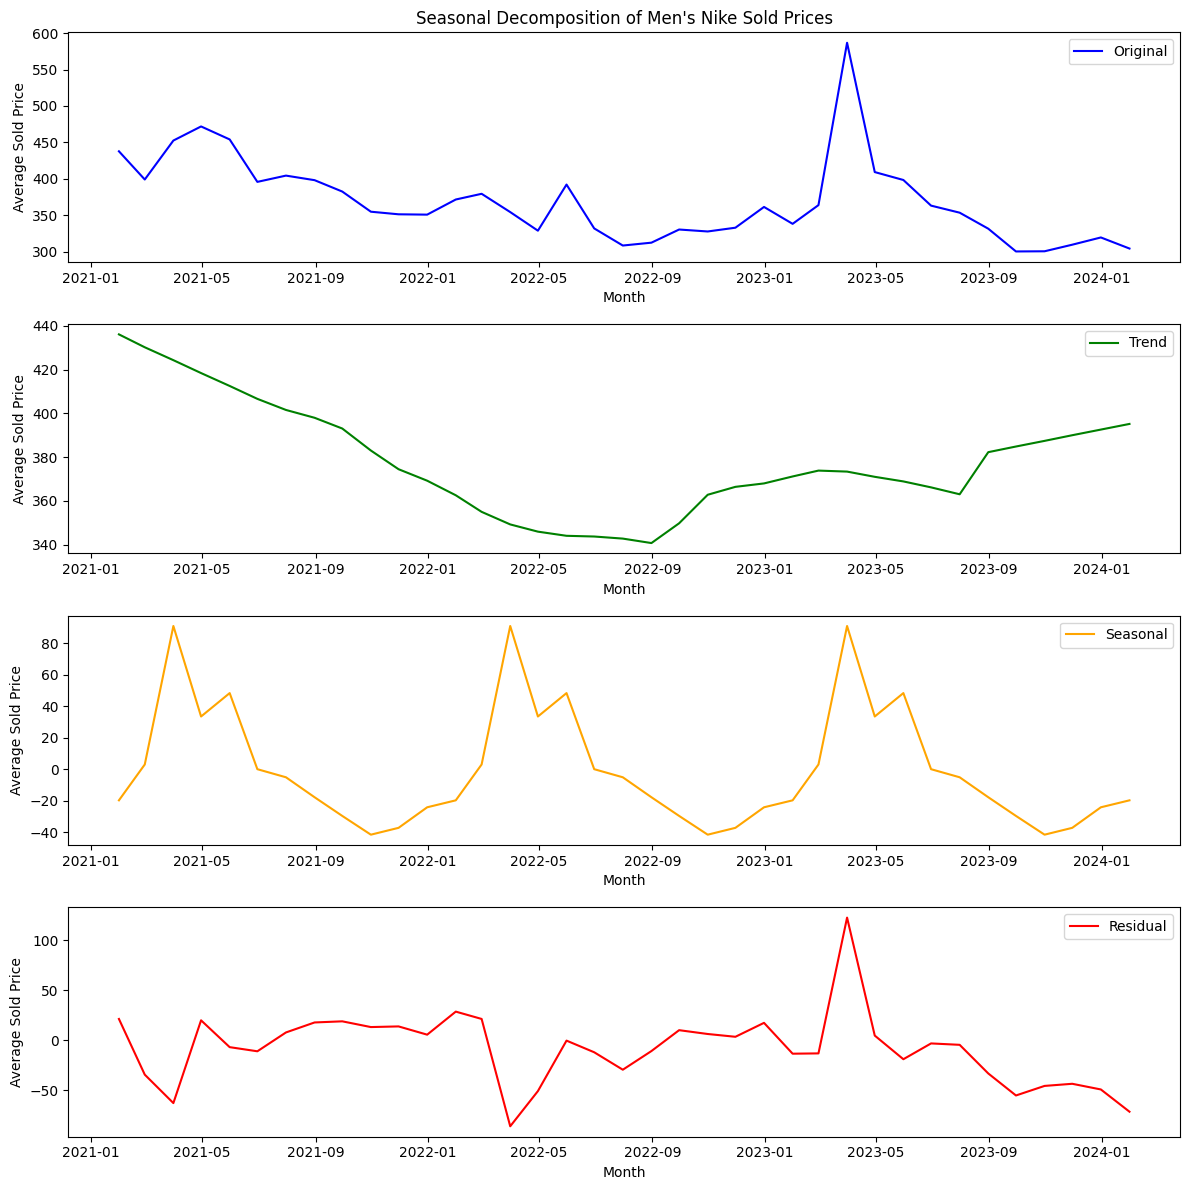

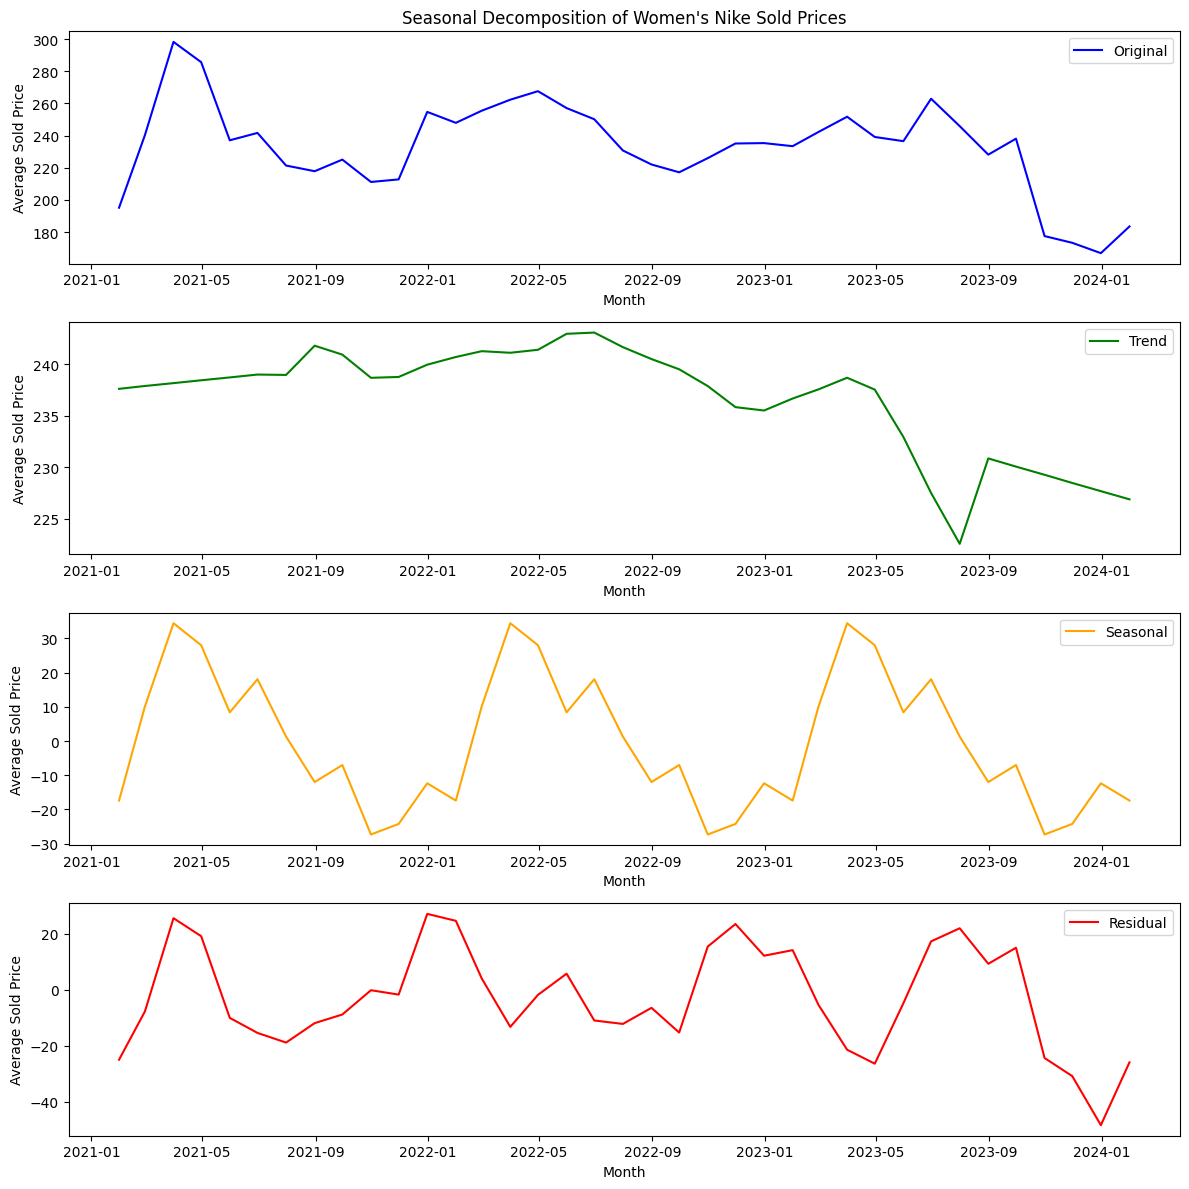

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE', 'SOLD_AT', 'BRAND', and 'GENDER'
# Adjust the column names and DataFrame structure as per your actual data

# Filter data for only the 'Nike' brand
nike_df = combined_df[combined_df['BRAND'] == 'Nike']

# Filter data for gender 'Men'
nike_men_df = nike_df[nike_df['GENDER'] == 'men']

# Filter data for gender 'Women'
nike_women_df = nike_df[nike_df['GENDER'] == 'women']

# Convert 'SOLD_AT' column to datetime format
nike_men_df['SOLD_AT'] = pd.to_datetime(nike_men_df['SOLD_AT'])
nike_women_df['SOLD_AT'] = pd.to_datetime(nike_women_df['SOLD_AT'])

# Set 'SOLD_AT' as the index
nike_men_df.set_index('SOLD_AT', inplace=True)
nike_women_df.set_index('SOLD_AT', inplace=True)

# Resample data to monthly frequency
nike_men_monthly = nike_men_df.resample('M').mean()
nike_women_monthly = nike_women_df.resample('M').mean()

# Perform seasonal decomposition for men's and women's sold prices
decomposition_men = seasonal_decompose(nike_men_monthly['SOLD_PRICE'], model='additive', extrapolate_trend='freq')
decomposition_women = seasonal_decompose(nike_women_monthly['SOLD_PRICE'], model='additive', extrapolate_trend='freq')

# Plotting the decomposition results for men's sold prices
plt.figure(figsize=(12, 12))

# Men's decomposition
plt.subplot(4, 1, 1)
plt.plot(nike_men_monthly['SOLD_PRICE'], label="Original", color='blue')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')
plt.title("Seasonal Decomposition of Men's Nike Sold Prices")

plt.subplot(4, 1, 2)
plt.plot(decomposition_men.trend, label="Trend", color='green')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 3)
plt.plot(decomposition_men.seasonal, label="Seasonal", color='orange')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 4)
plt.plot(decomposition_men.resid, label="Residual", color='red')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.tight_layout()
plt.show()

# Plotting the decomposition results for women's sold prices
plt.figure(figsize=(12, 12))

# Women's decomposition
plt.subplot(4, 1, 1)
plt.plot(nike_women_monthly['SOLD_PRICE'], label="Original", color='blue')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')
plt.title("Seasonal Decomposition of Women's Nike Sold Prices")

plt.subplot(4, 1, 2)
plt.plot(decomposition_women.trend, label="Trend", color='green')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 3)
plt.plot(decomposition_women.seasonal, label="Seasonal", color='orange')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 4)
plt.plot(decomposition_women.resid, label="Residual", color='red')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.tight_layout()
plt.show()


# NIKE WOMEN 

13:25:38 - cmdstanpy - INFO - Chain [1] start processing
13:25:38 - cmdstanpy - INFO - Chain [1] done processing


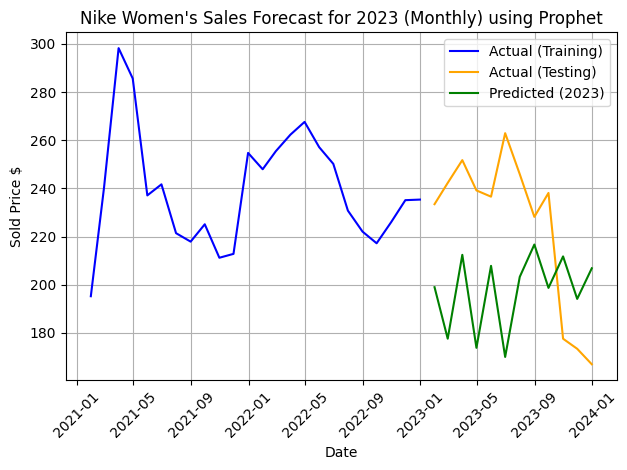

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Filter data for only the 'Nike' brand and gender 'women'
nike_women_df = combined_df[(combined_df['BRAND'] == 'Nike') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Nike women's products
nike_women_monthly = nike_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
nike_women_monthly.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Remove timezone information from the 'ds' column
nike_women_monthly['ds'] = nike_women_monthly['ds'].dt.tz_localize(None)

# Filter data for training (2021, 2022) and testing (2023)
train_data = nike_women_monthly[(nike_women_monthly['ds'] >= '2021-01-01') & (nike_women_monthly['ds'] <= '2022-12-31')]
test_data = nike_women_monthly[(nike_women_monthly['ds'] >= '2023-01-01') & (nike_women_monthly['ds'] <= '2023-12-31')]

# Initialize and fit the Prophet model with seasonality and holidays
model = Prophet(seasonality_mode='multiplicative')  # You can use 'multiplicative' for multiplicative seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Monthly seasonality
model.add_country_holidays(country_name='US')  # Add US holidays, you can specify a different country

# Fit the model
model.fit(train_data)

# Define the prediction period for 2023
prediction_start_date = '2023-01-01'
prediction_end_date = '2023-12-31'
prediction_period = pd.date_range(start=prediction_start_date, end=prediction_end_date, freq='M')

# Create a dataframe for the prediction period
future = pd.DataFrame({'ds': prediction_period})

# Make predictions for 2023
forecast = model.predict(future)

# Plot actual values for training data (2021, 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Testing)', color='orange')

# Plot predicted values for 2023
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (2023)', color='green')

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Nike Women's Sales Forecast for 2023 (Monthly) using Prophet")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  SARIMA For Nike Women

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


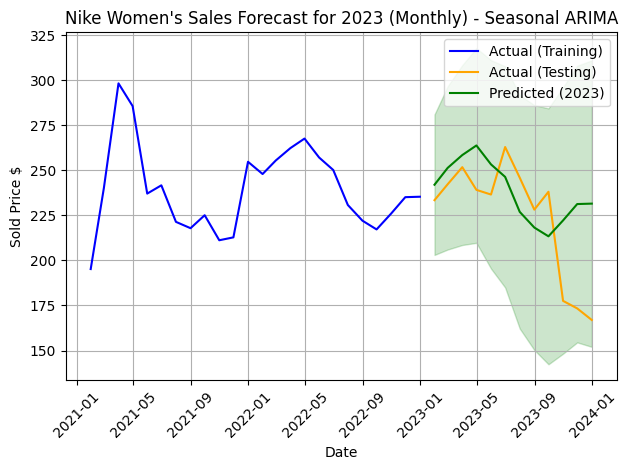

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filter data for only the 'Nike' brand and gender 'women'
nike_women_df = combined_df[(combined_df['BRAND'] == 'Nike') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Nike women's products
nike_women_monthly = nike_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
nike_women_monthly.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Remove timezone information from the 'ds' column
nike_women_monthly['ds'] = nike_women_monthly['ds'].dt.tz_localize(None)

# Filter data for training (2021, 2022) and testing (2023)
train_data = nike_women_monthly[(nike_women_monthly['ds'] >= '2021-01-01') & (nike_women_monthly['ds'] <= '2022-12-31')]
test_data = nike_women_monthly[(nike_women_monthly['ds'] >= '2023-01-01') & (nike_women_monthly['ds'] <= '2023-12-31')]

# Fit Seasonal ARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
sarima_model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast for 2023
forecast = sarima_result.get_forecast(steps=len(test_data))

# Plot actual values for training data (2021, 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Testing)', color='orange')

# Plot predicted values for 2023
plt.plot(test_data['ds'], forecast.predicted_mean, label='Predicted (2023)', color='green')

# Plot confidence interval for predicted values
plt.fill_between(test_data['ds'], forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='green', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Nike Women's Sales Forecast for 2023 (Monthly) - Seasonal ARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get the actual values for the testing period
actual_values = test_data['y']

# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 25.250996518786962
Mean Squared Error (MSE): 995.3944426673634
Root Mean Squared Error (RMSE): 31.549872308257658


The evaluation metrics for the SARIMA model applied to the Nike women's sales forecast for 2023 are as follows:

Mean Absolute Error (MAE): 25.25
Mean Squared Error (MSE): 995.39
Root Mean Squared Error (RMSE): 31.55
These metrics provide insights into the accuracy of the model's predictions:

MAE (Mean Absolute Error) measures the average absolute difference between the actual and predicted values. In this case, an MAE of 25.25 indicates that, on average, the model's predictions are approximately $25.25 off from the actual sold prices.

MSE (Mean Squared Error) measures the average squared difference between the actual and predicted values. The MSE value of 995.39 indicates the average magnitude of the squared errors.

RMSE (Root Mean Squared Error) is the square root of the MSE, providing a measure of the spread of the errors in the prediction. An RMSE of 31.55 suggests that, on average, the model's predictions deviate by approximately $31.55 from the actual sold prices.

In summary, the SARIMA model's performance can be considered reasonable, with the RMSE indicating that the model's predictions have some level of error, but it's not excessively high. However, the performance may vary depending on the specific context and requirements of the application. It's also essential to compare these metrics with those of alternative models or baseline methods to determine the relative effectiveness of the SARIMA model.

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


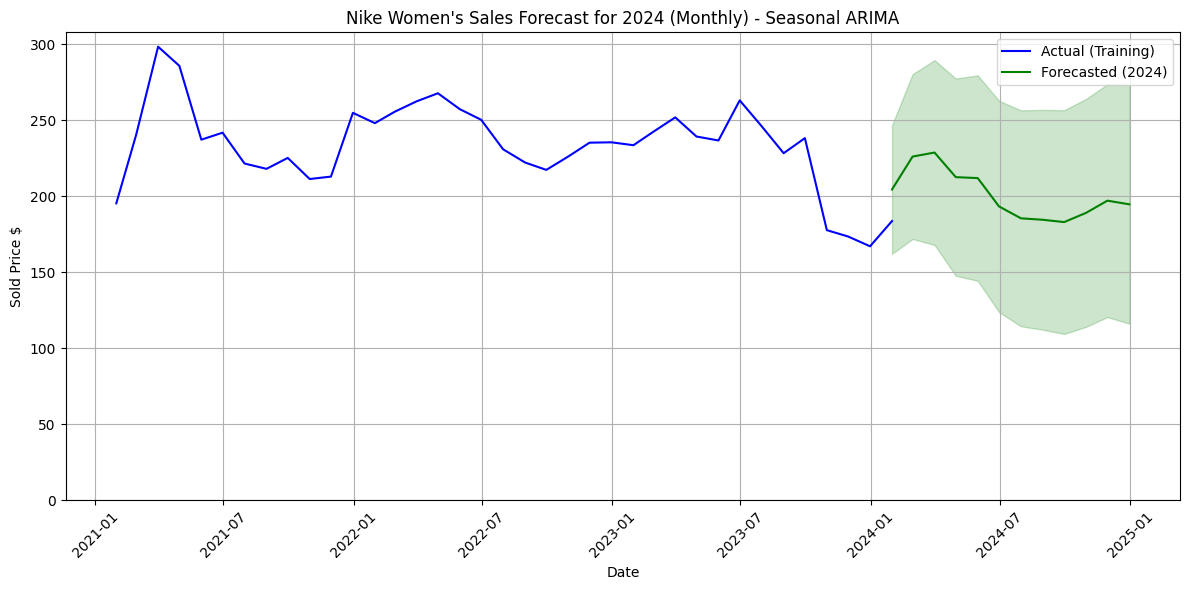

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filter data for only the 'Nike' brand and gender 'women'
nike_women_df = combined_df[(combined_df['BRAND'] == 'Nike') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Nike women's products
nike_women_monthly = nike_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
nike_women_monthly.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Remove timezone information from the 'ds' column
nike_women_monthly['ds'] = nike_women_monthly['ds'].dt.tz_localize(None)

# Filter data for training (2021, 2022, 2023)
train_data = nike_women_monthly[(nike_women_monthly['ds'] >= '2021-01-01') & (nike_women_monthly['ds'] <= '2024-01-31')]

# Fit Seasonal ARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
sarima_model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast for 2024
forecast_2024 = sarima_result.get_forecast(steps=12)  # Forecast for the entire year 2024 (12 months)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot actual values for training data (2021, 2022, 2023)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue')

# Plot forecasted values for 2024
plt.plot(pd.date_range(start='2024-01-01', periods=12, freq='M'), forecast_2024.predicted_mean, label='Forecasted (2024)', color='green')

# Plot confidence interval for forecasted values
plt.fill_between(pd.date_range(start='2024-01-01', periods=12, freq='M'), forecast_2024.conf_int().iloc[:, 0], forecast_2024.conf_int().iloc[:, 1], color='green', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Nike Women's Sales Forecast for 2024 (Monthly) - Seasonal ARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, None)  # Set y-axis lower limit to 0
plt.tight_layout()
plt.show()


# JORDAN WOMEN

# Seasonal decomposition analysis for Jordan

C:\Users\avija\AppData\Local\Temp\ipykernel_38884\711375456.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jordan_women_df['SOLD_AT'] = pd.to_datetime(jordan_women_df['SOLD_AT'])


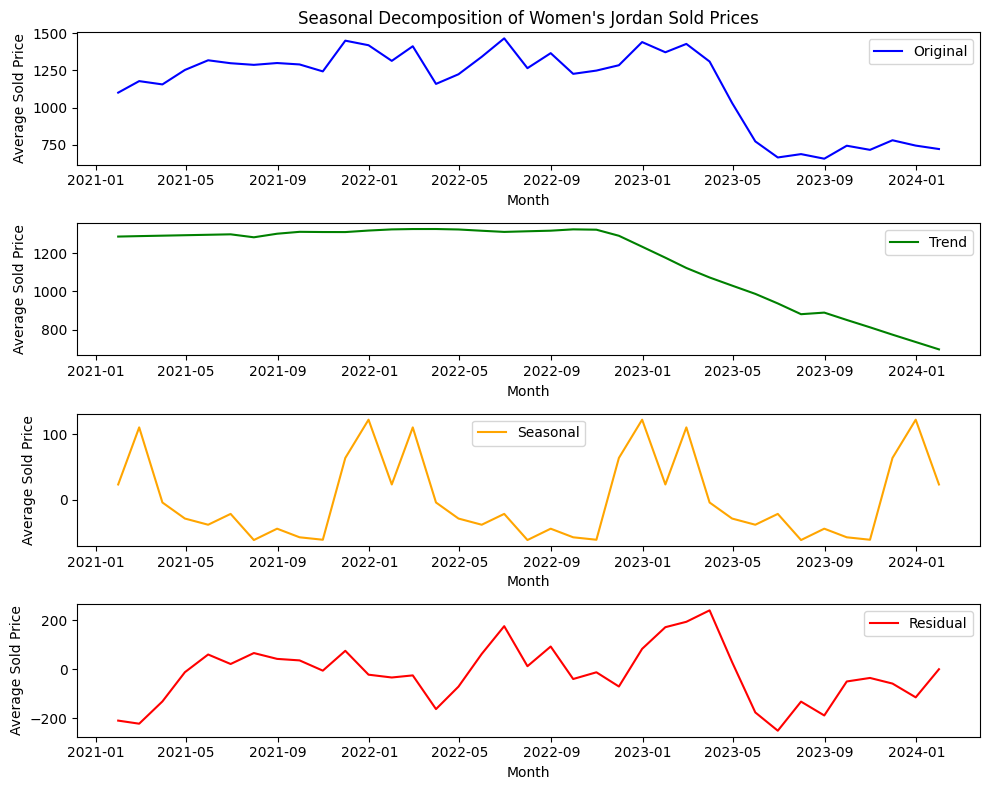

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE', 'SOLD_AT', 'BRAND', and 'GENDER'
# Adjust the column names and DataFrame structure as per your actual data

# Filter data for only the 'Jordan' brand
jordan_df = combined_df[combined_df['BRAND'] == 'Jordan']

# Filter data for gender 'Women'
jordan_women_df = jordan_df[jordan_df['GENDER'] == 'women']

# Convert 'SOLD_AT' column to datetime format

jordan_women_df['SOLD_AT'] = pd.to_datetime(jordan_women_df['SOLD_AT'])

# Set 'SOLD_AT' as the index

jordan_women_df.set_index('SOLD_AT', inplace=True)

# Resample data to monthly frequency

jordan_women_monthly = jordan_women_df.resample('M').mean()

# Perform seasonal decomposition for women's sold prices

decomposition_women = seasonal_decompose(jordan_women_monthly['SOLD_PRICE'], model='additive', extrapolate_trend='freq')


# Plotting the decomposition results for women's sold prices
plt.figure(figsize=(10, 8))

# Women's decomposition
plt.subplot(4, 1, 1)
plt.plot(jordan_women_monthly['SOLD_PRICE'], label="Original", color='blue')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')
plt.title("Seasonal Decomposition of Women's Jordan Sold Prices")

plt.subplot(4, 1, 2)
plt.plot(decomposition_women.trend, label="Trend", color='green')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 3)
plt.plot(decomposition_women.seasonal, label="Seasonal", color='orange')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 4)
plt.plot(decomposition_women.resid, label="Residual", color='red')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.tight_layout()
plt.show()


C:\Users\avija\AppData\Local\Temp\ipykernel_38884\2035815973.py:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  jordan_women_monthly.fillna(jordan_women_monthly.mean(), inplace=True)
21:14:24 - cmdstanpy - INFO - Chain [1] start processing
21:14:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\avija\AppData\Local\Temp\ipykernel_38884\2035815973.py:53: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  future.fillna(jordan_women_monthly.mean(), inplace=True)


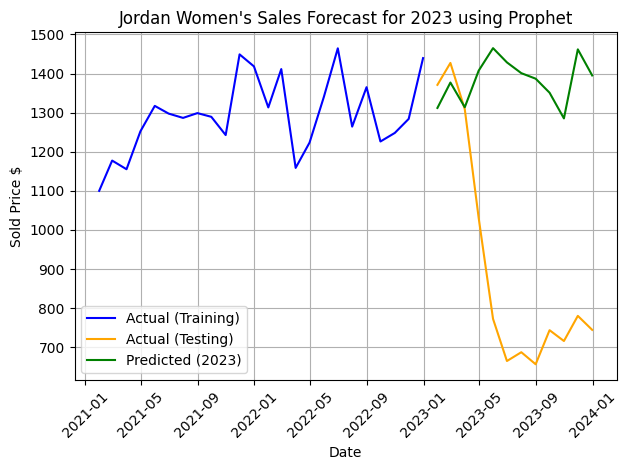

In [57]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Filter data for only the 'Jordan' brand and gender 'women'
jordan_women_df = combined_df[(combined_df['BRAND'] == 'Jordan') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Jordan women's products
jordan_women_monthly = jordan_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
jordan_women_monthly.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Remove timezone information from the 'ds' column
jordan_women_monthly['ds'] = jordan_women_monthly['ds'].dt.tz_localize(None)

# Add lag features
for i in range(1, 13):  # Add lag features for the past 12 months
    jordan_women_monthly[f'lag_{i}'] = jordan_women_monthly['y'].shift(i)

# Add rolling statistics
window = 3  # Window size for rolling mean and rolling standard deviation
jordan_women_monthly['rolling_mean'] = jordan_women_monthly['y'].rolling(window=window).mean()
jordan_women_monthly['rolling_std'] = jordan_women_monthly['y'].rolling(window=window).std()

# Fill NaN values with the mean of the respective columns
jordan_women_monthly.fillna(jordan_women_monthly.mean(), inplace=True)

# Filter data for training (2021, 2022) and testing (2023)
train_data = jordan_women_monthly[(jordan_women_monthly['ds'] >= '2021-01-01') & (jordan_women_monthly['ds'] <= '2022-12-31')]
test_data = jordan_women_monthly[(jordan_women_monthly['ds'] >= '2023-01-01') & (jordan_women_monthly['ds'] <= '2023-12-31')]

# Initialize and fit the Prophet model with additional regressors
model = Prophet(seasonality_mode='multiplicative')
for col in train_data.columns:
    if col != 'ds' and col != 'y':
        model.add_regressor(col)

# Fit the model
model.fit(train_data)

# Define the prediction period for 2023
prediction_start_date = '2023-01-01'
prediction_end_date = '2023-12-31'
prediction_period = pd.date_range(start=prediction_start_date, end=prediction_end_date, freq='M')

# Create a dataframe for the prediction period with lag features and rolling statistics
future = pd.DataFrame({'ds': prediction_period})
for i in range(1, 13):
    future[f'lag_{i}'] = jordan_women_monthly['y'].shift(i)
future['rolling_mean'] = jordan_women_monthly['y'].rolling(window=window).mean()
future['rolling_std'] = jordan_women_monthly['y'].rolling(window=window).std()

# Fill NaN values in the future dataframe with the mean of the respective columns
future.fillna(jordan_women_monthly.mean(), inplace=True)

# Make predictions for 2023
forecast = model.predict(future)

# Plot actual values for training data (2021, 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Testing)', color='orange')

# Plot predicted values for 2023
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (2023)', color='green')

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Jordan Women's Sales Forecast for 2023 using Prophet")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SARIMA for Jordan Women

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


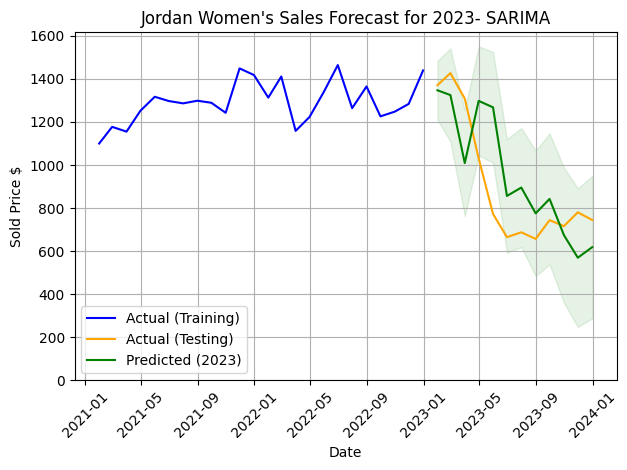

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filter data for only the 'Jordan' brand and gender 'women'
jordan_women_df = combined_df[(combined_df['BRAND'] == 'Jordan') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Jordan women's products
jordan_women_monthly = jordan_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean', 'SIZE_VALUE': 'mean'}).reset_index()
jordan_women_monthly.columns = ['ds', 'y', 'exog']  # Rename columns as required by SARIMAX, 'exog' for exogenous variable

# Remove timezone information from the 'ds' column
jordan_women_monthly['ds'] = jordan_women_monthly['ds'].dt.tz_localize(None)

# Filter data for training (2021, 2022) and testing (2023)
train_data = jordan_women_monthly[(jordan_women_monthly['ds'] >= '2021-01-01') & (jordan_women_monthly['ds'] <= '2022-12-31')]
test_data = jordan_women_monthly[(jordan_women_monthly['ds'] >= '2023-01-01') & (jordan_women_monthly['ds'] <= '2023-12-31')]

# Fit SARIMA model with adjusted parameters and including the exogenous variable SIZE_VALUE
order = (2, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order adjusted to monthly seasonality
sarima_model = SARIMAX(train_data['y'], exog=train_data['exog'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, trend='t')
sarima_result = sarima_model.fit()

# Forecast for 2023
forecast = sarima_result.get_forecast(steps=len(test_data), exog=test_data['exog'])  # Pass exogenous variable for forecasting

# Plot actual values for training data (2021, 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Testing)', color='orange')

# Plot predicted values for 2023
plt.plot(test_data['ds'], forecast.predicted_mean, label='Predicted (2023)', color='green')

# Plot confidence interval for predicted values with reduced width
plt.fill_between(test_data['ds'], forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='green', alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Jordan Women's Sales Forecast for 2023- SARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(bottom=0)
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['y'], forecast.predicted_mean)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['y'], forecast.predicted_mean)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Evaluation Metrics:")
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


Evaluation Metrics:
Mean Absolute Error (MAE): 182.10
Mean Squared Error (MSE): 48678.32
Root Mean Squared Error (RMSE): 220.63


Evaluation Metrics:

Mean Absolute Error (MAE): 182.10
Mean Squared Error (MSE): 48678.32
Root Mean Squared Error (RMSE): 220.63

The SARIMA model forecasts Jordan women's sales for 2023. Despite capturing some patterns, the model exhibits relatively high error metrics, indicating room for improvement. Further refinements may enhance forecasting performance.

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


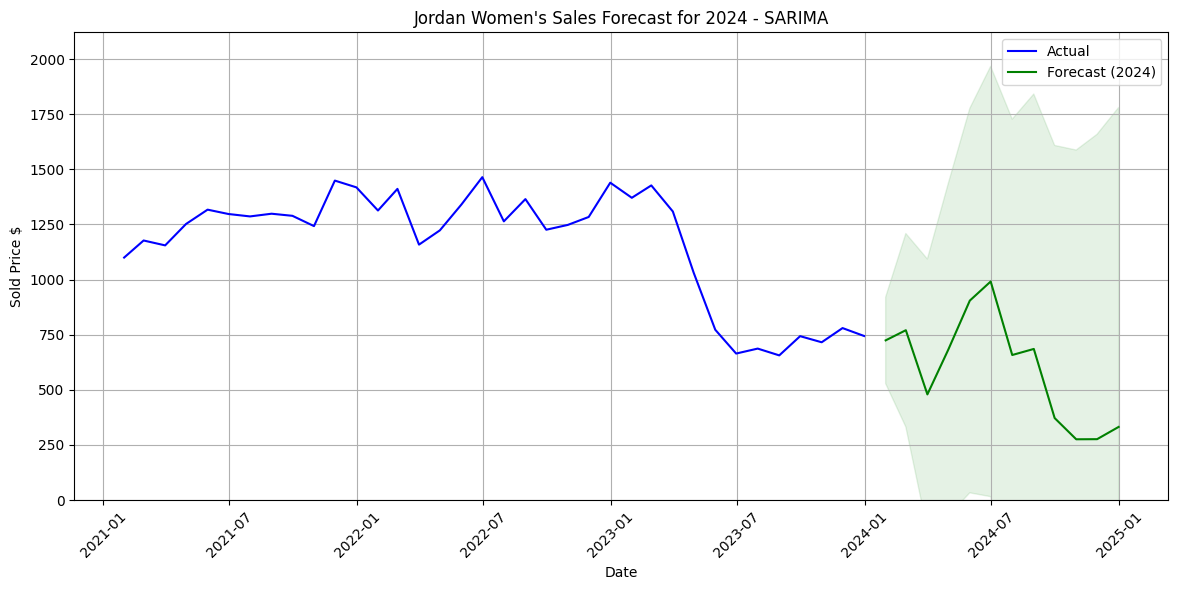

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats

# Filter data for only the 'Jordan' brand and gender 'women'
jordan_women_df = combined_df[(combined_df['BRAND'] == 'Jordan') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Jordan women's products
jordan_women_monthly = jordan_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
jordan_women_monthly.columns = ['ds', 'y']  # Rename columns as required by SARIMAX

# Remove timezone information from the 'ds' column
jordan_women_monthly['ds'] = jordan_women_monthly['ds'].dt.tz_localize(None)

# Calculate Z-scores for 'SOLD_PRICE'
z_scores = stats.zscore(jordan_women_monthly['y'])
abs_z_scores = np.abs(z_scores)

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
filtered_data = jordan_women_monthly[abs_z_scores < threshold]

# Filter data for training after removing outliers
train_data = filtered_data[(filtered_data['ds'] >= '2021-01-01') & (filtered_data['ds'] <= '2024-01-10')]

# Fit SARIMA model without exogenous variable
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order adjusted to monthly seasonality
sarima_model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, trend='t')
sarima_result = sarima_model.fit()

# Forecast for 2024
forecast_2024_start = '2024-01-01'
forecast_2024_end = '2024-12-31'
forecast_2024_period = pd.date_range(start=forecast_2024_start, end=forecast_2024_end, freq='M')

# Forecast sales for 2024
forecast_2024_result = sarima_result.get_forecast(steps=len(forecast_2024_period))

# Plot actual values for known data
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Actual', color='blue')

# Plot forecasted values for 2024
plt.plot(forecast_2024_period, forecast_2024_result.predicted_mean, label='Forecast (2024)', color='green')

# Plot confidence interval for forecasted values
plt.fill_between(forecast_2024_period, forecast_2024_result.conf_int().iloc[:, 0], forecast_2024_result.conf_int().iloc[:, 1], color='green', alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Jordan Women's Sales Forecast for 2024 - SARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(bottom=0)
plt.show()


# ADIDAS WOMEN 

# Seasonal decomposition for Adidas

C:\Users\avija\AppData\Local\Temp\ipykernel_38884\1332824532.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas_women_df['SOLD_AT'] = pd.to_datetime(adidas_women_df['SOLD_AT'])


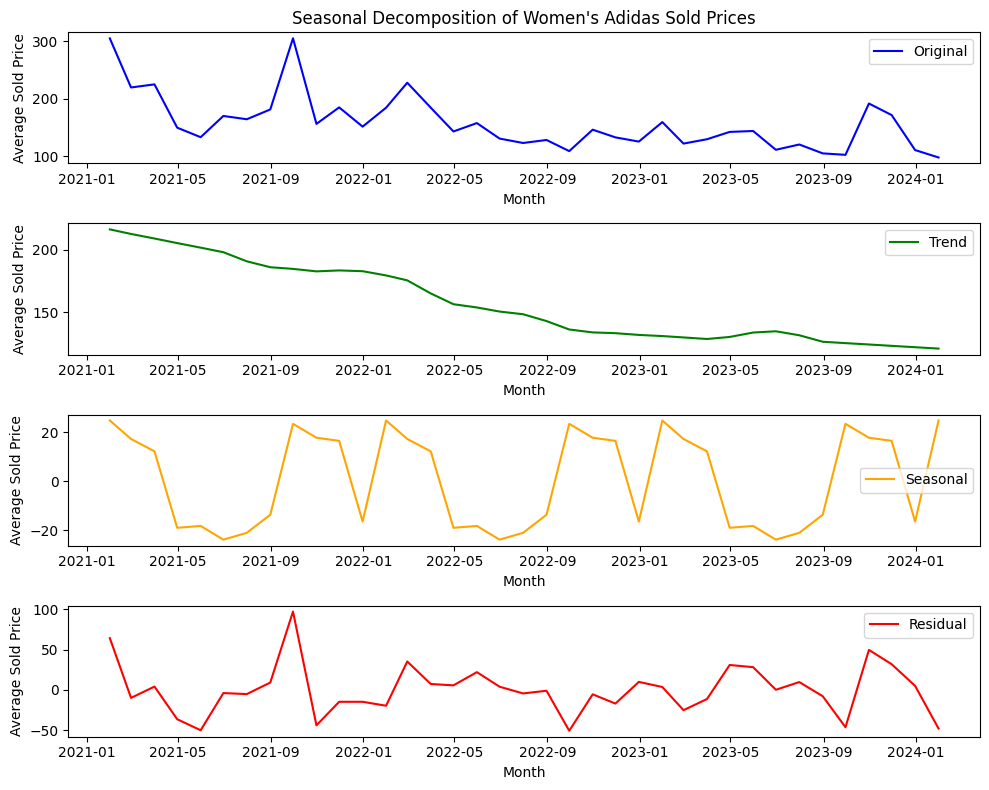

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'combined_df' contains the combined DataFrame with the necessary columns including 'SOLD_PRICE', 'SOLD_AT', 'BRAND', and 'GENDER'
# Adjust the column names and DataFrame structure as per your actual data

# Filter data for only the 'Adidas' brand
adidas_df = combined_df[combined_df['BRAND'] == 'adidas']

# Filter data for gender 'Women'
adidas_women_df = adidas_df[adidas_df['GENDER'] == 'women']

# Convert 'SOLD_AT' column to datetime format

adidas_women_df['SOLD_AT'] = pd.to_datetime(adidas_women_df['SOLD_AT'])

# Set 'SOLD_AT' as the index

adidas_women_df.set_index('SOLD_AT', inplace=True)

# Resample data to monthly frequency

adidas_women_monthly = adidas_women_df.resample('M').mean()

# Perform seasonal decomposition for women's sold prices

decomposition_women = seasonal_decompose(adidas_women_monthly['SOLD_PRICE'], model='additive', extrapolate_trend='freq')


# Plotting the decomposition results for women's sold prices
plt.figure(figsize=(10, 8))

# Women's decomposition
plt.subplot(4, 1, 1)
plt.plot(adidas_women_monthly['SOLD_PRICE'], label="Original", color='blue')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')
plt.title("Seasonal Decomposition of Women's Adidas Sold Prices")

plt.subplot(4, 1, 2)
plt.plot(decomposition_women.trend, label="Trend", color='green')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 3)
plt.plot(decomposition_women.seasonal, label="Seasonal", color='orange')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.subplot(4, 1, 4)
plt.plot(decomposition_women.resid, label="Residual", color='red')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Sold Price')

plt.tight_layout()
plt.show()


# PROPHET MODEL FOR ADIDAS

19:13:01 - cmdstanpy - INFO - Chain [1] start processing
19:13:10 - cmdstanpy - INFO - Chain [1] done processing
19:13:10 - cmdstanpy - INFO - Chain [1] start processing
19:13:17 - cmdstanpy - INFO - Chain [1] done processing
19:13:17 - cmdstanpy - INFO - Chain [1] start processing
19:13:21 - cmdstanpy - INFO - Chain [1] done processing
19:13:22 - cmdstanpy - INFO - Chain [1] start processing
19:13:45 - cmdstanpy - INFO - Chain [1] done processing
19:13:45 - cmdstanpy - INFO - Chain [1] start processing
19:14:11 - cmdstanpy - INFO - Chain [1] done processing
19:14:12 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:35 - cmdstanpy - INFO - Chain [1] start processing
19:14:57 - cmdstanpy - INFO - Chain [1] done processing
19:14:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:24 - cmdstanpy - INFO - Chain [1] done processing
19:15:24 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1]

Best Parameters: OrderedDict([('lp__', array([[573.323]])), ('k', array([[-0.196841]])), ('m', array([[0.546325]])), ('delta', array([[-4.12969e-06, -7.35610e-06,  2.16902e-06,  3.44781e-06,
        -2.34153e-05, -2.74411e-03, -4.72463e-02, -1.29727e-03,
        -8.87650e-04, -1.01128e-04, -2.28669e-05, -3.70196e-05,
        -4.09567e-05, -1.14282e-04, -3.42051e-04, -2.90459e-03,
        -1.87875e-03, -1.03445e-05]])), ('sigma_obs', array([[3.96473e-11]])), ('beta', array([[-0.491658 , -0.296059 ,  1.20129  , -1.91631  ,  2.00057  ,
        -2.10757  ,  1.5843   , -2.56093  , -1.15951  ,  0.556219 ,
        -3.91518  , -0.547925 , -0.788858 , -0.503789 ,  0.429887 ,
         3.19107  ,  1.39497  ,  2.95229  ,  1.0671   ,  2.08954  ,
        -0.384032 ,  0.0559556, -0.124617 ,  0.0384174,  0.035725 ,
         0.188302 ]])), ('trend', array([[0.546325, 0.53844 , 0.52971 , 0.521262, 0.512532, 0.504083,
        0.495352, 0.486499, 0.475904, 0.464899, 0.45421 , 0.443161,
        0.43211 , 0

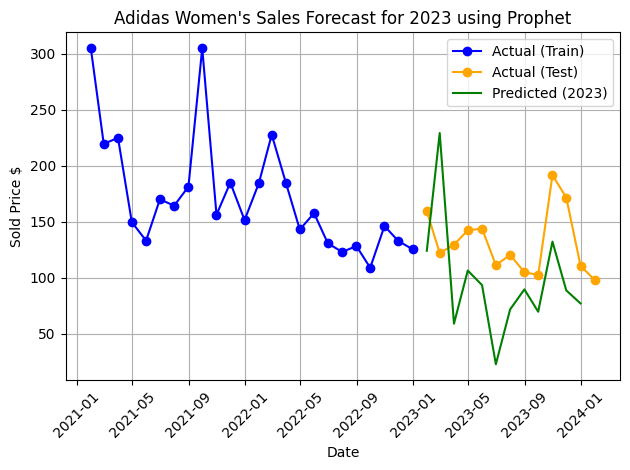

In [101]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
import numpy as np

# Filter data for only the 'Adidas' brand and gender 'women'
adidas_women_df = combined_df[(combined_df['BRAND'] == 'adidas') & (combined_df['GENDER'] == 'women')]

# Aggregate data to monthly frequency and calculate mean SOLD_PRICE for Adidas women's products
adidas_women_monthly = adidas_women_df.resample('M', on='SOLD_AT').agg({'SOLD_PRICE': 'mean'}).reset_index()
adidas_women_monthly.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Remove timezone information from the 'ds' column
adidas_women_monthly['ds'] = adidas_women_monthly['ds'].dt.tz_localize(None)

# Split data into training (2021, 2022) and testing (2023)
train_data = adidas_women_monthly[adidas_women_monthly['ds'] < '2023-01-01']
test_data = adidas_women_monthly[adidas_women_monthly['ds'] >= '2023-01-01']

# Define a function to create and fit the Prophet model
def create_prophet_model(changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(seasonality_mode='multiplicative',
                    yearly_seasonality=True,  # Add yearly seasonality
                    weekly_seasonality=True,  # Add weekly seasonality
                    daily_seasonality=False,  # No daily seasonality
                    changepoint_prior_scale=changepoint_prior_scale,
                    seasonality_prior_scale=seasonality_prior_scale)
    return model.fit(train_data)

# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1.0, 10.0, 20.0]
}

# Generate all possible combinations of parameters
grid = ParameterGrid(param_grid)

best_model = None
best_mae = np.inf

# Iterate over each parameter combination
for params in grid:
    model = create_prophet_model(params['changepoint_prior_scale'], params['seasonality_prior_scale'])
    forecast = model.predict(test_data)
    mae = mean_absolute_error(test_data['y'], forecast['yhat'])
    
    # Check if this model has the lowest MAE so far
    if mae < best_mae:
        best_mae = mae
        best_model = model

# Print the best parameters and the corresponding MAE
print("Best Parameters:", best_model.params)
print("Best MAE:", best_mae)

# Make predictions for 2023 using the best model
prediction_period = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
future = pd.DataFrame({'ds': prediction_period})
forecast = best_model.predict(future)

# Plot actual values for training data (until 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Train)', color='blue', marker='o')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Test)', color='orange', marker='o')

# Plot predicted values for 2023
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (2023)', color='green')

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Adidas Women's Sales Forecast for 2023 using Prophet")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SARIMA For Adidas

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\avija\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\

Best RMSE: 51.74334956201736


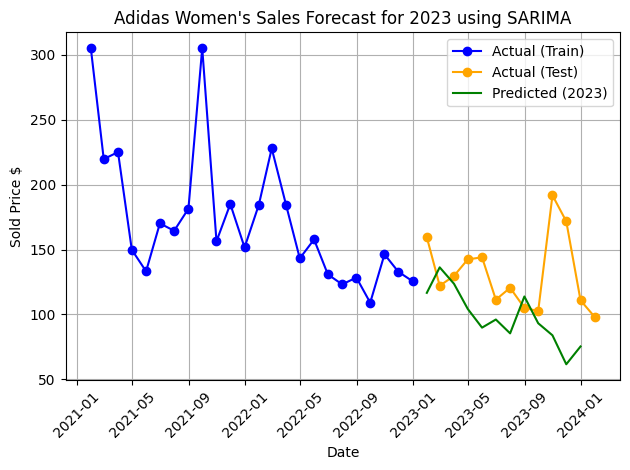

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_model = None
best_rmse = float('inf')

# Iterate over each parameter combination
for params in grid:
    order = (2, 1, 2)  # Define SARIMA order
    seasonal_order = (1, 1, 1, 6)  # Define seasonal SARIMA order
    
    model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit()
    
    forecast = fitted_model.forecast(steps=len(test_data))
    rmse = math.sqrt(mean_squared_error(test_data['y'], forecast))
    
    # Check if this model has the lowest RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = fitted_model

# Print the best RMSE
print("Best RMSE:", best_rmse)

# Make predictions for 2023 using the best model
forecast = best_model.forecast(steps=len(future))

# Plot actual values for training data (until 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Train)', color='blue', marker='o')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Test)', color='orange', marker='o')

# Plot predicted values for 2023
plt.plot(future, forecast, label='Predicted (2023)', color='green')

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Adidas Women's Sales Forecast for 2023 using SARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Adidas prediction for 2024 using SARIMA

c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\avija\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\avija\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\

Best RMSE: 51.74334956201736


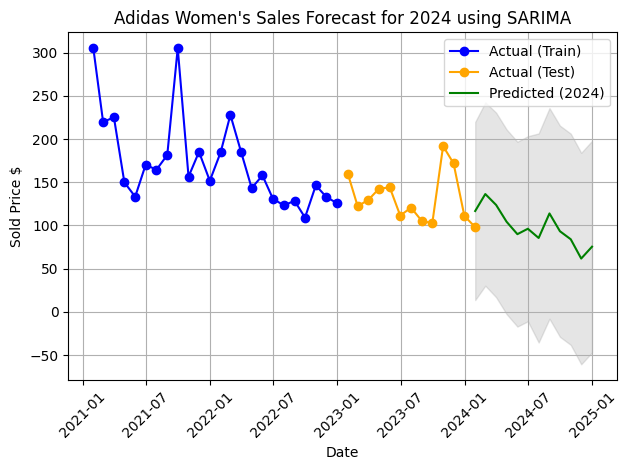

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define SARIMA order and seasonal order
order = (2, 1, 2)
seasonal_order = (1, 1, 1, 6)

# Initialize best model and best RMSE
best_model = None
best_rmse = float('inf')

# Iterate over each parameter combination
for params in grid:
    # Fit SARIMAX model
    model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit()

    # Forecast sales for the testing period (2023)
    forecast = fitted_model.forecast(steps=len(test_data))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((test_data['y'] - forecast) ** 2))

    # Update best model and best RMSE if necessary
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = fitted_model

# Print the best RMSE
print("Best RMSE:", best_rmse)

# Predict sales for the year 2024
prediction_start_date_2024 = '2024-01-01'
prediction_end_date_2024 = '2024-12-31'
prediction_period_2024 = pd.date_range(start=prediction_start_date_2024, end=prediction_end_date_2024, freq='M')

# Forecast sales for 2024
forecast_2024 = best_model.get_forecast(steps=len(prediction_period_2024))
forecast_values_2024 = forecast_2024.predicted_mean
confidence_intervals_2024 = forecast_2024.conf_int()

# Plot actual values for training data (until 2022)
plt.plot(train_data['ds'], train_data['y'], label='Actual (Train)', color='blue', marker='o')

# Plot actual values for testing data (2023)
plt.plot(test_data['ds'], test_data['y'], label='Actual (Test)', color='orange', marker='o')

# Plot predicted values for 2023
plt.plot(prediction_period_2024, forecast_values_2024, label='Predicted (2024)', color='green')

# Plot confidence intervals for 2024
plt.fill_between(prediction_period_2024, confidence_intervals_2024.iloc[:, 0], confidence_intervals_2024.iloc[:, 1], color='gray', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Sold Price $')
plt.title("Adidas Women's Sales Forecast for 2024 using SARIMA")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
